# Logistic Regression
- Supervised Machine Learning Algorithm

In [13]:
# Import relevant modules
import math
import numpy as np
import seaborn as sns
import pandas as pd
from time import time

# Import plotting modules
from matplotlib import pyplot as plt
%matplotlib inline

#Import spreadsheet modules
from openpyxl.reader.excel import load_workbook

# Import random number generator
import random
from random import shuffle

# Import Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics    


# Loading Credit Card Data from Excel file
Considering only these (top 4 correlated) attributes :
- Years Employed
- Prior Default
- Employed
- Credit Score

In [2]:
# Opening the Excel file with data
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []

# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income

    cols = [8, 9, 10, 11]
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    y.append(sheet.cell(row=num+1,column=16).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 654):
    valx, valy = read(j)
    if "?" in valx:
        print(j, read(j))
    x_data.append(valx)    
    y_data.append(valy)

#print(x_data, y_data)

# Generate Random Number for Shuffling

In [3]:

random.seed(455534) # random number generator, a specific random number will be used in every iteration of the code
toshuffle = list(zip(x_data, y_data)) #zip x and y (keeps x and y together)
shuffle(toshuffle) # shuffle
x_data, y_data = zip(*toshuffle) # open the shuffled data sets

# Model Evaluation using Confusion Matrix

In [22]:

# ~ 15% test ; ~ 85% train
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets


# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.9, penalty='l1', tol=0.01)
logreg.fit(train_x, train_y)
y_pred=logreg.predict(test_x)


cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[53, 11],
       [ 1, 35]], dtype=int64)

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 15.0, 'Predicted label')

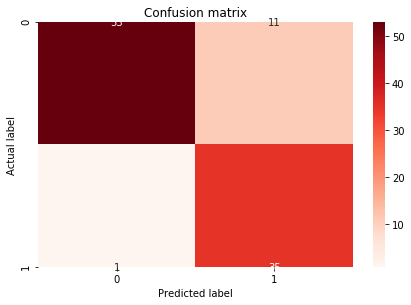

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# put the major ticks at the middle of each cell
#data = np.random.rand(2,2)
#ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
#ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)


plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds', fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Predicted Labels 

In [24]:
print(y_pred)

[1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0]


# Confusion Matrix Evaluation Metrics

In [25]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred)*100)

Accuracy: 88.0


# Receiver Operating Characteristic, (ROC) Curve

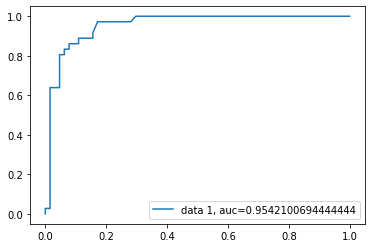

In [8]:
y_pred_proba = logreg.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Tuning Parameters: Gridsearch algorithm 

In [20]:
x, y = x_data, y_data
x, y = np.asarray(x), np.asarray(y)

clf = LogisticRegression(solver='liblinear')

# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#, 'tol':[0.001,.009,0.01,.09,1,5,10,25], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(clf, param_grid, scoring = 'recall')
start=time()
grid.fit(x, y.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from time import time

x, y = x_data, y_data
x, y = np.asarray(x), np.asarray(y)

clf = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2','elasticnet', 'none'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#, 'tol':[0.001,.009,0.01,.09,1,5,10,25]}
grid = GridSearchCV(clf, param_grid, scoring = 'recall')
grid.fit(x, y.ravel())


#Predict values based on new parameters
y_pred = grid.predict(test_x)


# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(test_y, y_pred)*100))
print('Precision Score : ' + str(precision_score(test_y, y_pred)*100))
print('Recall Score : ' + str(recall_score(test_y, y_pred)*100))
print('F1 Score : ' + str(f1_score(test_y, y_pred)*100))


#Logistic Regression (Grid Search) Confusion matrix
print("\n\nConfusion Matrix : \n", confusion_matrix(test_y, y_pred))


C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.